In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [147]:
with open("../data/normalize_by_population_value.csv", "r") as f:
    df = pd.read_csv(f)
df.head()

,Level,Category,Variable,County,Date,GEOID,State FIPS,State,Value,Denominator,Denominator Description,Row-ID,Latitude,Longitude,Location,Year,normalize_by_population_value
0,County,Bridges,"Bridges, poor","Greeley County, Nebraska",01/01/2018 12:00:00 AM,31077,31,Nebraska,10.0,89.0,Bridges,bridges-poor-2018-31077,41.567444,-98.521218,POINT (-98.521218 41.567444),2018,0.004149
1,County,Bridges,"Bridges, fair","Lewis County, Missouri",01/01/2017 12:00:00 AM,29111,29,Missouri,72.0,167.0,Bridges,bridges-fair-2017-29111,40.096875,-91.722106,POINT (-91.722106 40.096875),2017,0.007144
2,County,Bridges,"Bridges, fair","Knox County, Ohio",01/01/2018 12:00:00 AM,39083,39,Ohio,107.0,284.0,Bridges,bridges-fair-2018-39083,40.398760,-82.421514,POINT (-82.421514 40.39876),2018,0.001748
3,County,Bridges,Total bridges,"Harnett County, North Carolina",01/01/2017 12:00:00 AM,37085,37,North Carolina,135.0,135.0,Bridges,bridges-2017-37085,35.368633,-78.869415,POINT (-78.869415 35.368633),2017,0.001049
4,County,Bridges,Total bridges,"Gem County, Idaho",01/01/2017 12:00:00 AM,16045,16,Idaho,56.0,56.0,Bridges,bridges-2017-16045,43.979330,-116.432524,POINT (-116.432524 43.97933),2017,0.003323


In [148]:
df['normalize_by_population_value'].max()

3916.0

In [149]:
df['normalize_by_population_value']

0          0.004149
1          0.007144
2          0.001748
3          0.001049
4          0.003323
            ...    
51287      1.000000
51288      0.000440
51289      0.000859
51290      0.001004
51291    119.000000
Name: normalize_by_population_value, Length: 51292, dtype: float64

# The below code find that only those counties with low normalized bridge value will have poor bridges!

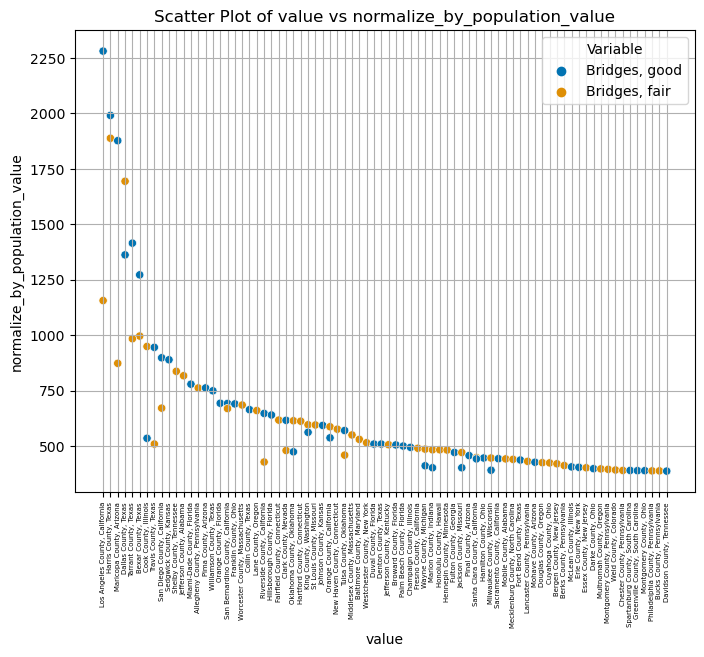

<Figure size 1000x600 with 0 Axes>

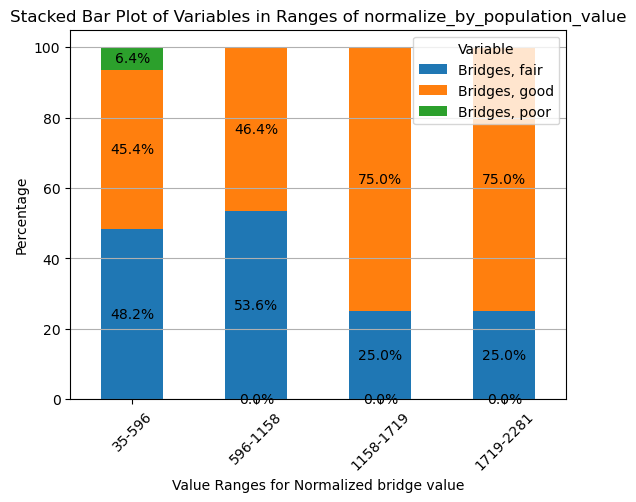

In [150]:
bridge = df[df['Variable'] != 'Total bridges']
bridgetop100 = bridge.nlargest(100, 'normalize_by_population_value')
plt.figure(figsize=(8, 6))
sns.scatterplot(data=bridgetop100, x='County', y='normalize_by_population_value', hue='Variable', palette='colorblind')
plt.title('Scatter Plot of value vs normalize_by_population_value')
plt.xlabel('value', fontsize=10)
plt.ylabel('normalize_by_population_value')
plt.legend(title='Variable')
plt.xticks(rotation=90, fontsize = 5)
plt.grid(True)
plt.show()

poorbridge = bridge.nlargest(5000, 'normalize_by_population_value')
min_value = poorbridge['normalize_by_population_value'].min()
max_value = poorbridge['normalize_by_population_value'].max()
value_range = max_value - min_value
range_size = value_range / 4
ranges = [min_value + i * range_size for i in range(5)]
labels = [f"{int(ranges[i])}-{int(ranges[i+1])}" for i in range(4)]
poorbridge['range'] = pd.cut(poorbridge['normalize_by_population_value'], bins=ranges, labels=labels)
pivot_table = poorbridge.pivot_table(index='range', columns='Variable', aggfunc='size', fill_value=0)
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
ax = pivot_table_percentage.plot(kind='bar', stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.title('Stacked Bar Plot of Variables in Ranges of normalize_by_population_value')
plt.xlabel('Value Ranges for Normalized bridge value')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Variable')
plt.grid(axis='y')
plt.show()

In [151]:
lowbridge = poorbridge[( poorbridge['normalize_by_population_value'] <= 596 ) & (poorbridge['Variable'] == "Bridges, poor")]

In [152]:
with open("../data/data.csv", "r") as f:
    fulldata = pd.read_csv(f)
filteredfulldata = fulldata[fulldata['County'].isin(lowbridge['County'].tolist())]

In [153]:
filteredfulldata = filteredfulldata[filteredfulldata['Variable'] == 'Commute by car/ truck/van']
filteredfulldata.head()

,Level,Category,Variable,County,Date,GEOID,State FIPS,State,Value,Denominator,Denominator Description,Row-ID,Latitude,Longitude,Location,Year
150994,County,Commuting,Commute by car/ truck/van,"Jasper County, Iowa",01/01/2019 12:00:00 AM,19099,19,Iowa,15897.0,17771.0,Workers 16 years & older,workers-car-2019-19099,41.686029,-93.053754,POINT (-93.053754 41.686029),2019
151044,County,Commuting,Commute by car/ truck/van,"Montgomery County, Iowa",01/01/2018 12:00:00 AM,19137,19,Iowa,4286.0,4733.0,Workers 16 years & older,workers-car-2018-19137,41.030147,-95.156357,POINT (-95.156357 41.030147),2018
151168,County,Commuting,Commute by car/ truck/van,"Muskingum County, Ohio",01/01/2018 12:00:00 AM,39119,39,Ohio,34977.0,37263.0,Workers 16 years & older,workers-car-2018-39119,39.965428,-81.944376,POINT (-81.944376 39.965428),2018
151230,County,Commuting,Commute by car/ truck/van,"Caddo County, Oklahoma",01/01/2018 12:00:00 AM,40015,40,Oklahoma,10357.0,11156.0,Workers 16 years & older,workers-car-2018-40015,35.174382,-98.375140,POINT (-98.37514 35.174382),2018
151298,County,Commuting,Commute by car/ truck/van,"York County, South Carolina",01/01/2019 12:00:00 AM,45091,45,South Carolina,120325.0,131129.0,Workers 16 years & older,workers-car-2019-45091,34.974733,-81.184371,POINT (-81.184371 34.974733),2019


# I filter out rows whose normalized bridge value is in the lowest range and whose category falls into 'Bridges, poor", then I see for those rows, how their commuting value distributes

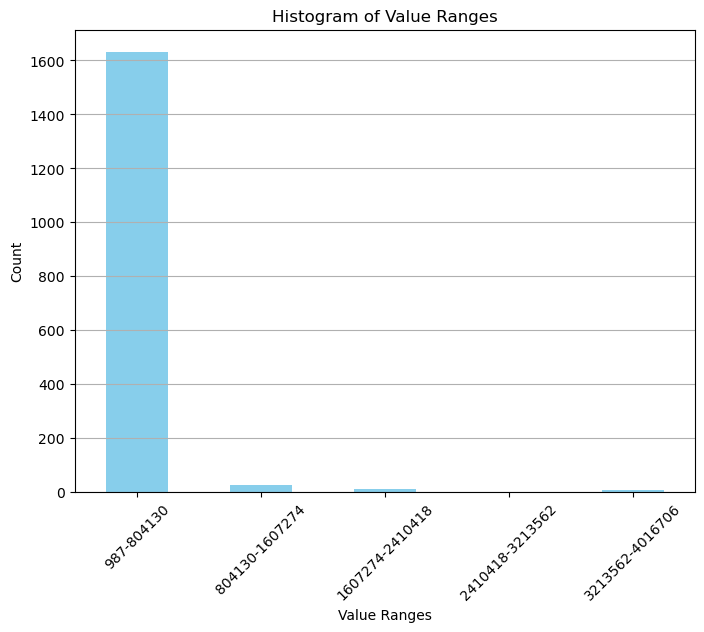

In [154]:
min_value = filteredfulldata['Value'].min()
max_value = filteredfulldata['Value'].max()
value_range = max_value - min_value
range_size = value_range / 5

ranges = [min_value + i * range_size for i in range(6)]
labels = [f"{int(ranges[i])}-{int(ranges[i+1])}" for i in range(5)]

filteredfulldata['Range'] = pd.cut(filteredfulldata['Value'], bins=ranges, labels=labels)
plt.figure(figsize=(8, 6))
filteredfulldata['Range'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Histogram of Value Ranges')
plt.xlabel('Value Ranges')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

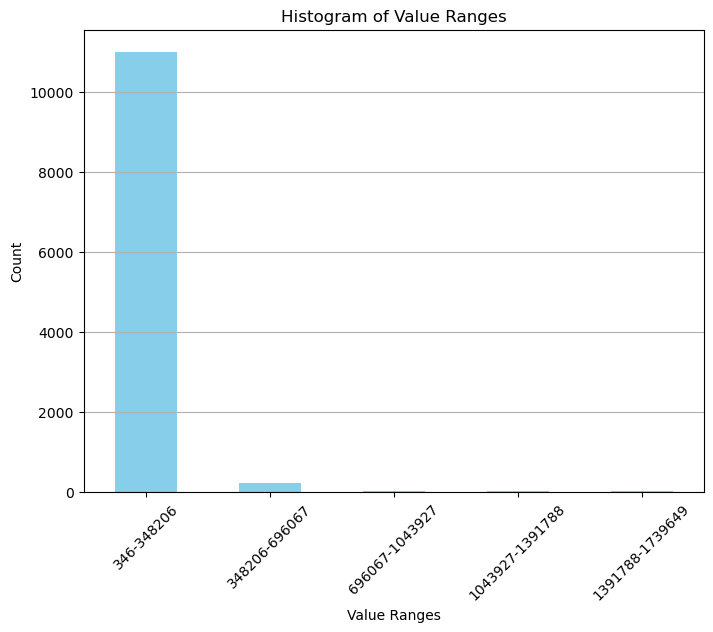

In [155]:
goodbridge = poorbridge[( poorbridge['normalize_by_population_value'] <= 596 ) & (poorbridge['Variable'] == "Bridges, good")]
filteredfulldata1 = fulldata[fulldata['County'].isin(goodbridge['County'].tolist())]
filteredfulldata1 = filteredfulldata1[filteredfulldata1['Variable'] == 'Commute by car/ truck/van']
min_value = filteredfulldata1['Value'].min()
max_value = filteredfulldata1['Value'].max()
value_range = max_value - min_value
range_size = value_range / 5

ranges = [min_value + i * range_size for i in range(6)]
labels = [f"{int(ranges[i])}-{int(ranges[i+1])}" for i in range(5)]

filteredfulldata1['Range'] = pd.cut(filteredfulldata1['Value'], bins=ranges, labels=labels)
plt.figure(figsize=(8, 6))
filteredfulldata1['Range'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Histogram of Value Ranges')
plt.xlabel('Value Ranges')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# In conclusion, for counties withh low normalized bridge value, if a county has higher population, the bridge quality is more likely to be poor.